In [1]:
import yfinance as yf
import pandas as pd

[*********************100%%**********************]  1 of 1 completed


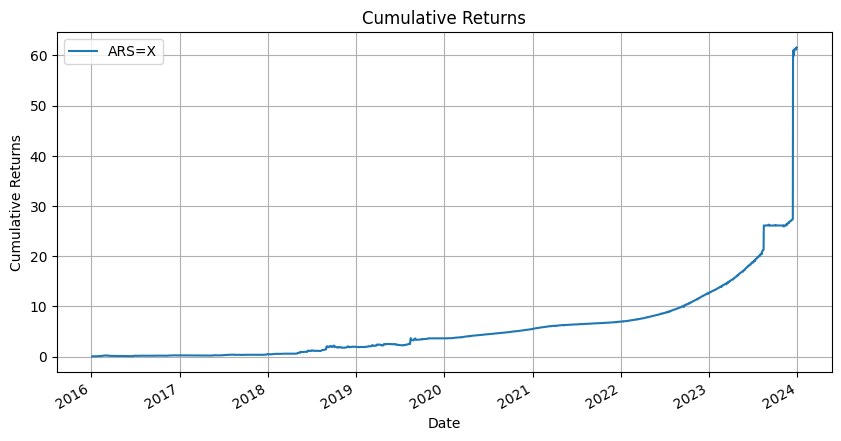

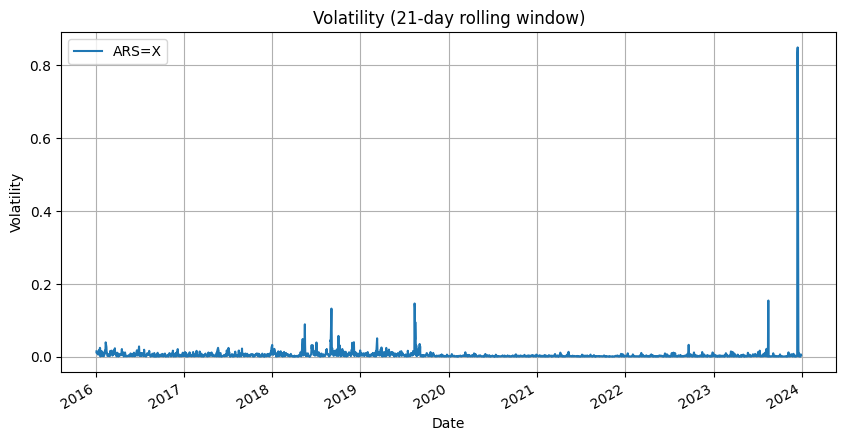

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers and the start and end dates
tickers = ['ARS=X']
start_date = '2016-01-01'
end_date = '2024-01-01'

# Download historical data
data = yf.download(tickers, start=start_date, end=end_date)

# Calculate daily returns
daily_returns = data['Adj Close'].pct_change()

# Calculate cumulative returns
cumulative_returns = (daily_returns + 1).cumprod() - 1

# Calculate volatility with a time window of 21 days
volatility_21d = daily_returns.rolling(window=2).std()

# Plot the cumulative returns
plt.figure(figsize=(10, 5))
cumulative_returns.plot()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(tickers)
plt.grid(True)
plt.show()

# Plot the volatility
plt.figure(figsize=(10, 5))
volatility_21d.plot()
plt.title('Volatility (21-day rolling window)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(tickers)
plt.grid(True)
plt.show()


In [3]:
import yfinance as yf

# Define the tickers and the start and end dates
tickers = ['AAPL', 'NVDA', '^GSPC']  # Add ^GSPC for S&P 500
start_date = '2023-01-01'
end_date = '2024-03-22'  # Adjust this to the current date if running later

# Download historical data
data = yf.download(tickers, start=start_date, end=end_date)

# Calculate daily returns
# Adjusted Close Price is used for calculating returns to account for dividends and stock splits
daily_returns = data['Adj Close'].pct_change()

print(daily_returns)

[*********************100%%**********************]  3 of 3 completed

Ticker          AAPL      NVDA     ^GSPC
Date                                    
2023-01-03       NaN       NaN       NaN
2023-01-04  0.010314  0.030318  0.007539
2023-01-05 -0.010605 -0.032816 -0.011646
2023-01-06  0.036794  0.041640  0.022841
2023-01-09  0.004089  0.051753 -0.000768
...              ...       ...       ...
2024-03-15 -0.002197 -0.001217 -0.006483
2024-03-18  0.006372  0.007036  0.006318
2024-03-19  0.013585  0.010661  0.005649
2024-03-20  0.014709  0.010895  0.008904
2024-03-21 -0.040857  0.011762  0.003237

[306 rows x 3 columns]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


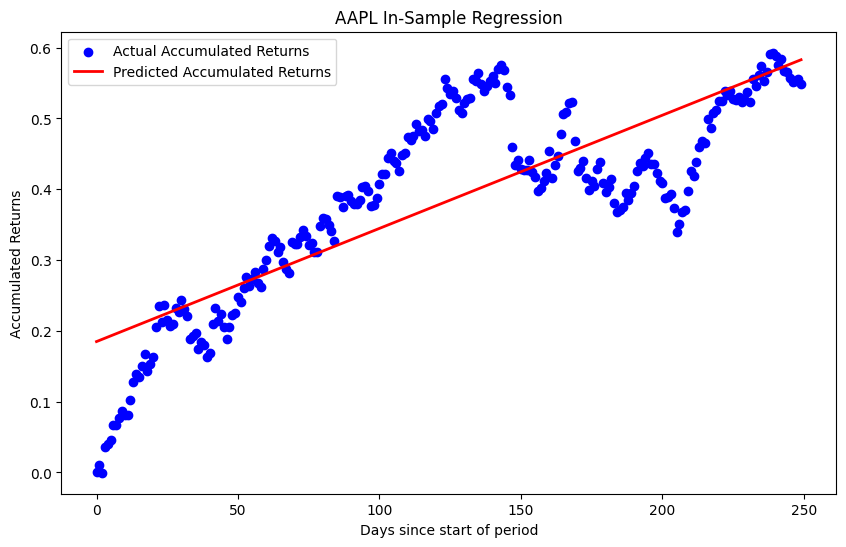

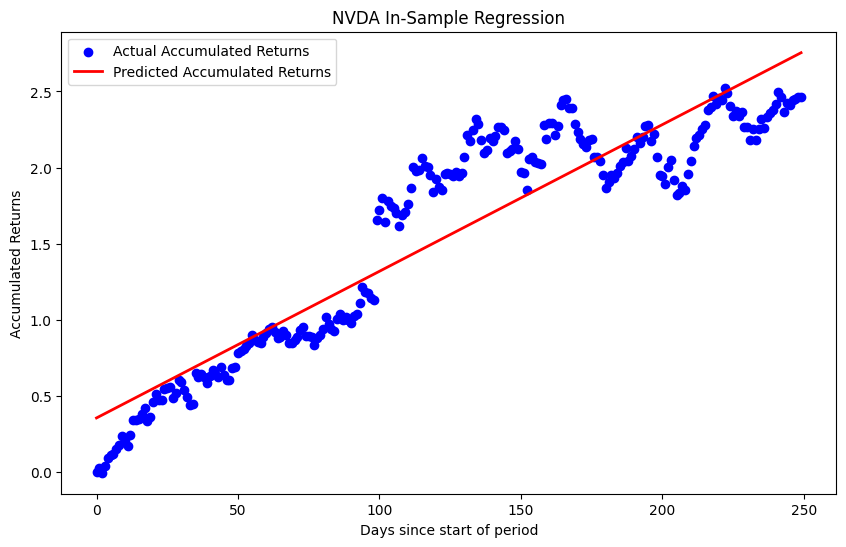

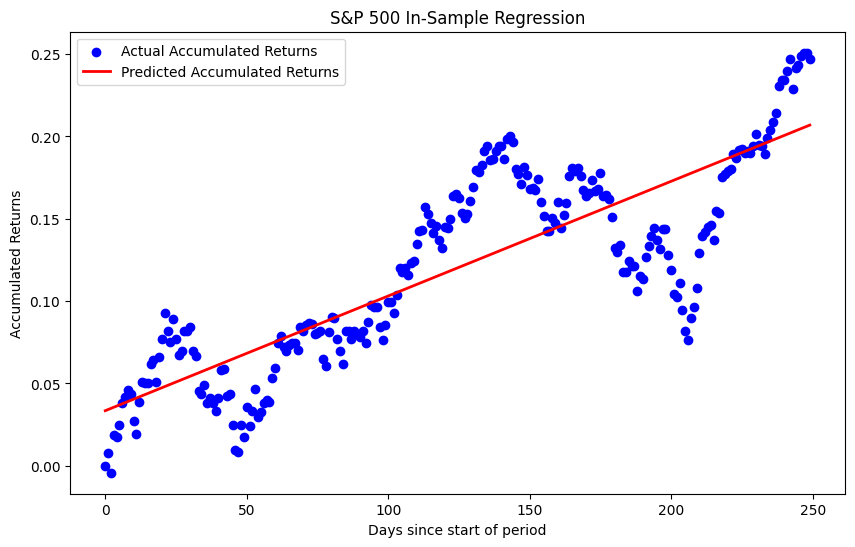

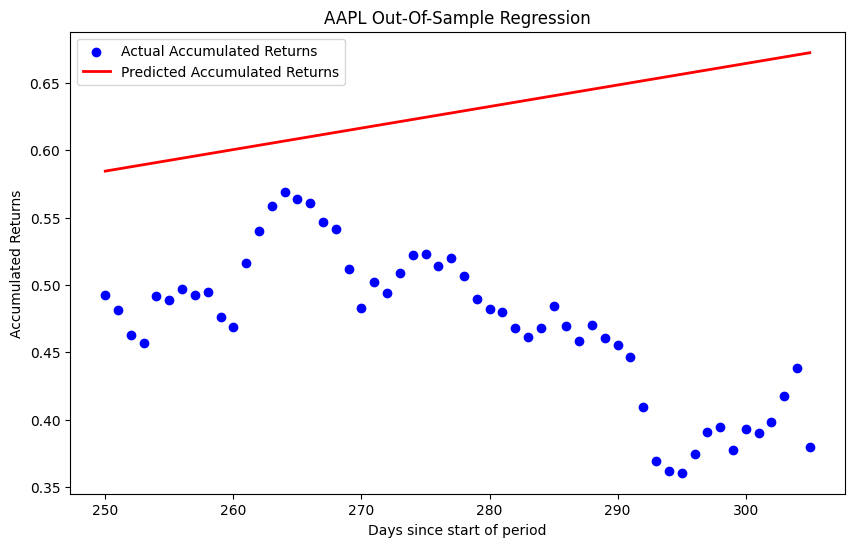

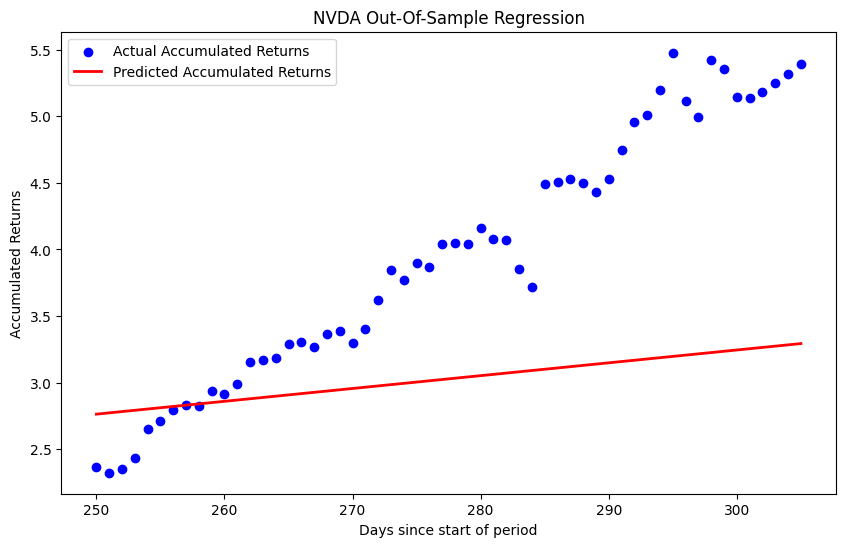

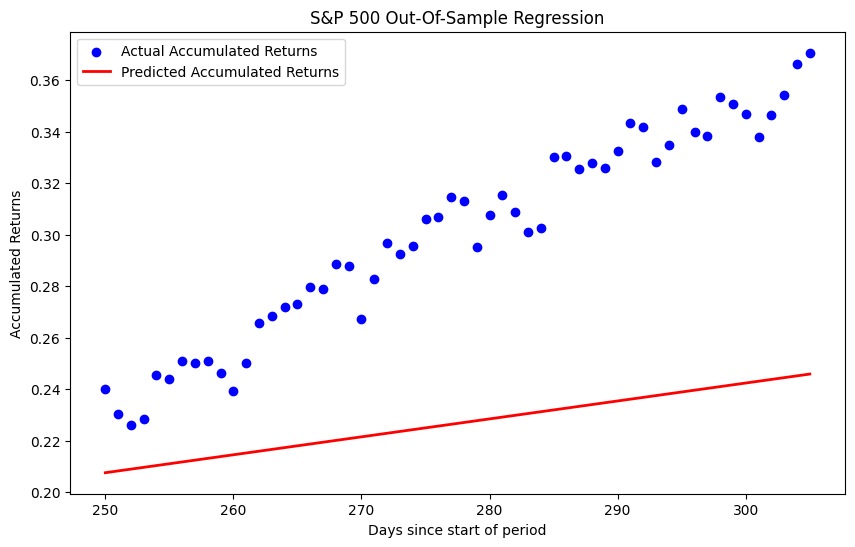

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def fetch_and_process_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Returns'] = data['Adj Close'].pct_change()
    data['Accumulated Returns'] = data['Returns'].add(1).cumprod().subtract(1)
    return data.fillna(0)  # Fill NaN values with 0

def prepare_data_for_regression(data):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Accumulated Returns'].values
    return X, y

def plot_regression_results(X, y, model, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Accumulated Returns')
    plt.plot(X, model.predict(X), color='red', linewidth=2, label='Predicted Accumulated Returns')
    plt.title(title)
    plt.xlabel('Days since start of period')
    plt.ylabel('Accumulated Returns')
    plt.legend()
    plt.show()

# Parameters
start_date = '2023-01-01'
end_date_in_sample = '2023-12-31'
start_date_out_sample = '2024-01-01'
end_date_out_sample = '2024-03-22'

# Fetch and process data
aapl_data = fetch_and_process_data('AAPL', start_date, end_date_out_sample)
nvda_data = fetch_and_process_data('NVDA', start_date, end_date_out_sample)
sp500_data = fetch_and_process_data('^GSPC', start_date, end_date_out_sample)  # S&P 500 data

# Split into in-sample and out-of-sample
aapl_in_sample = aapl_data[start_date:end_date_in_sample]
aapl_out_sample = aapl_data[start_date_out_sample:end_date_out_sample]

nvda_in_sample = nvda_data[start_date:end_date_in_sample]
nvda_out_sample = nvda_data[start_date_out_sample:end_date_out_sample]

sp500_in_sample = sp500_data[start_date:end_date_in_sample]  # S&P 500 in-sample data
sp500_out_sample = sp500_data[start_date_out_sample:end_date_out_sample]  # S&P 500 out-of-sample data

# Prepare the data
X_aapl, y_aapl = prepare_data_for_regression(aapl_in_sample)
X_nvda, y_nvda = prepare_data_for_regression(nvda_in_sample)
X_sp500, y_sp500 = prepare_data_for_regression(sp500_in_sample)  # S&P 500 data

# Linear Regression
lr_aapl = LinearRegression().fit(X_aapl, y_aapl)
lr_nvda = LinearRegression().fit(X_nvda, y_nvda)
lr_sp500 = LinearRegression().fit(X_sp500, y_sp500)  # Linear Regression for S&P 500

# Plotting In-sample
plot_regression_results(X_aapl, y_aapl, lr_aapl, 'AAPL In-Sample Regression')
plot_regression_results(X_nvda, y_nvda, lr_nvda, 'NVDA In-Sample Regression')
plot_regression_results(X_sp500, y_sp500, lr_sp500, 'S&P 500 In-Sample Regression')

# For Out-of-sample, we adjust the X axis to continue from in-sample
X_aapl_out = np.arange(len(aapl_in_sample), len(aapl_in_sample) + len(aapl_out_sample)).reshape(-1, 1)
X_nvda_out = np.arange(len(nvda_in_sample), len(nvda_in_sample) + len(nvda_out_sample)).reshape(-1, 1)
X_sp500_out = np.arange(len(sp500_in_sample), len(sp500_in_sample) + len(sp500_out_sample)).reshape(-1, 1)  # Adjusted for S&P 500

y_aapl_out = aapl_out_sample['Accumulated Returns'].values
y_nvda_out = nvda_out_sample['Accumulated Returns'].values
y_sp500_out = sp500_out_sample['Accumulated Returns'].values  # S&P 500 Out-of-Sample data

# Plotting Out-of-sample predictions
plot_regression_results(X_aapl_out, y_aapl_out, lr_aapl, 'AAPL Out-Of-Sample Regression')
plot_regression_results(X_nvda_out, y_nvda_out, lr_nvda, 'NVDA Out-Of-Sample Regression')
plot_regression_results(X_sp500_out, y_sp500_out, lr_sp500, 'S&P 500 Out-Of-Sample Regression')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


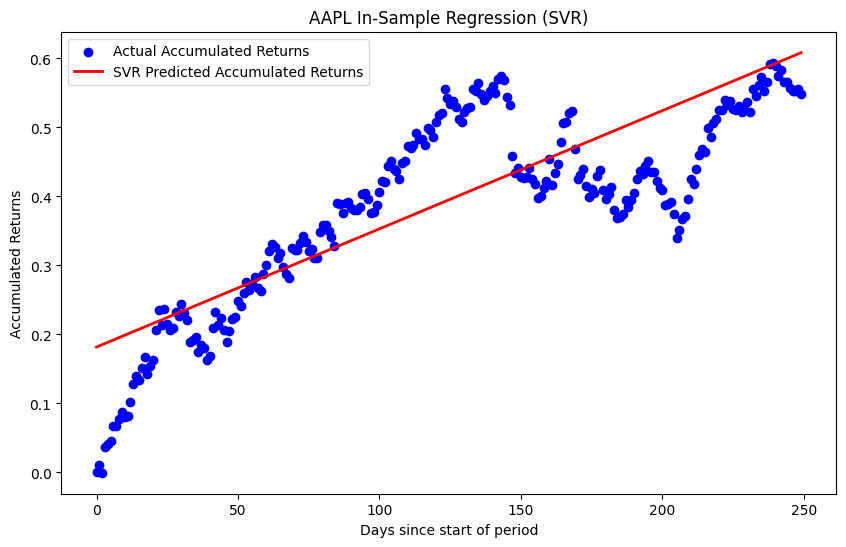

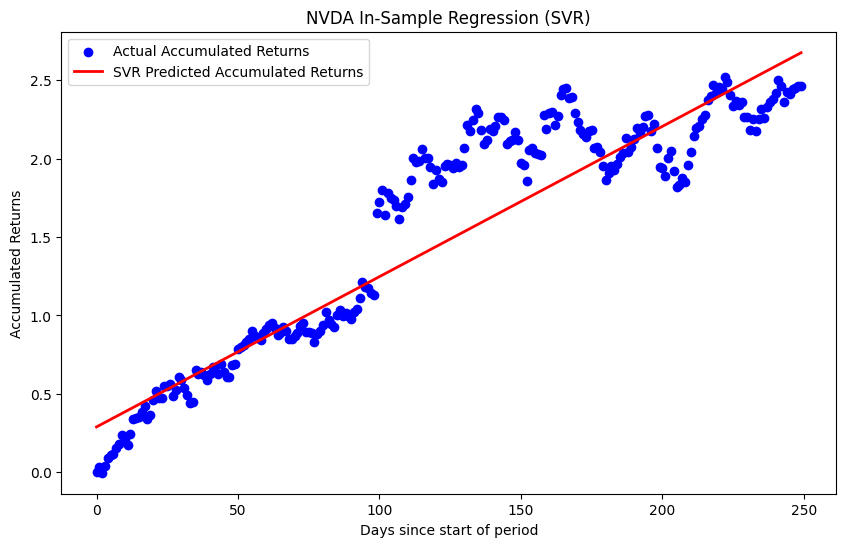

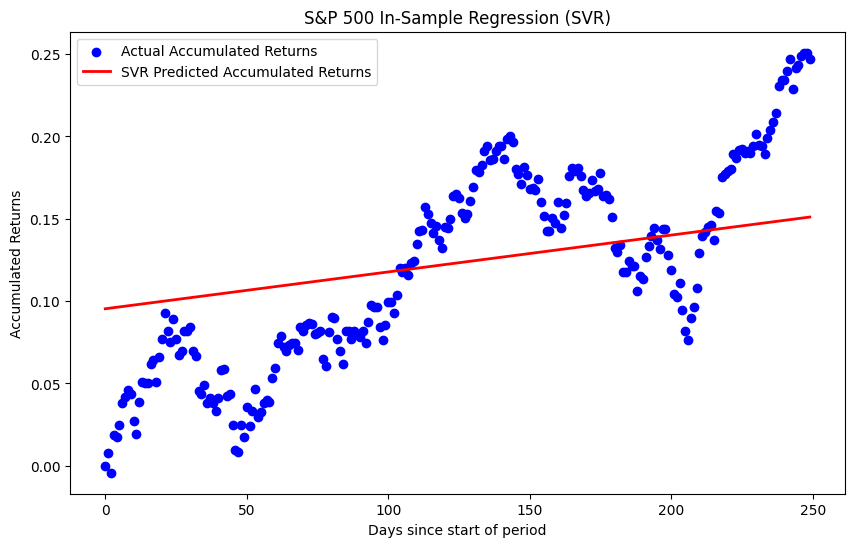

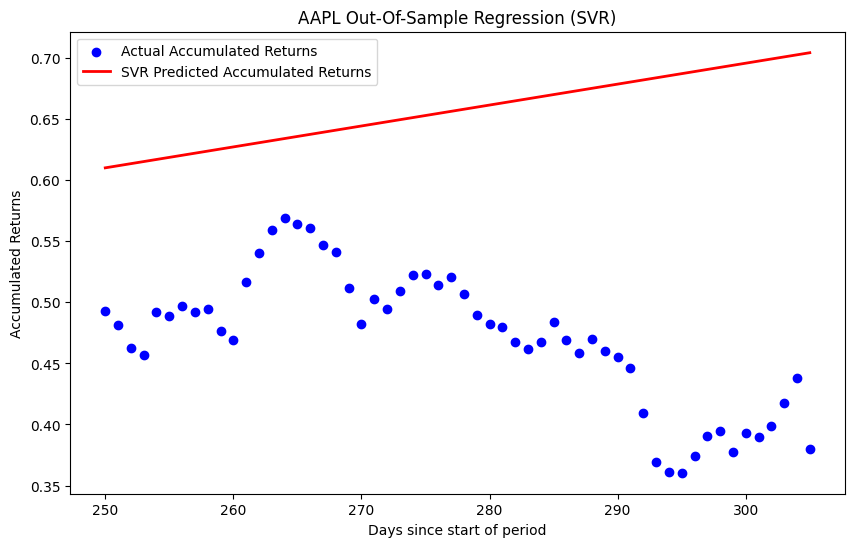

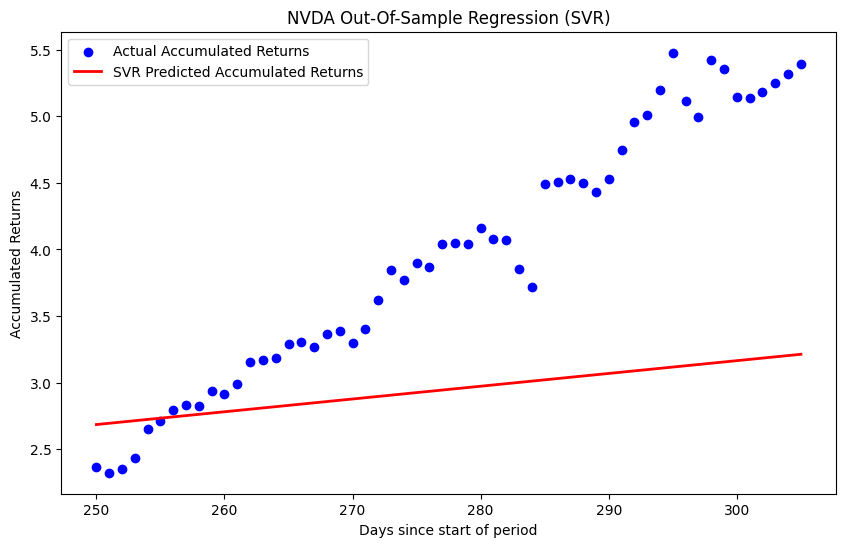

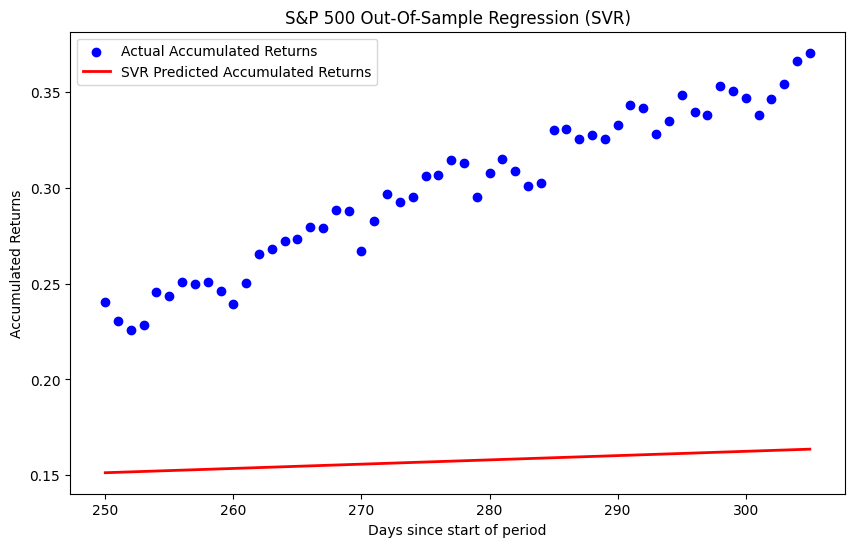

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

def fetch_and_process_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Returns'] = data['Adj Close'].pct_change()
    data['Accumulated Returns'] = data['Returns'].add(1).cumprod().subtract(1)
    return data.fillna(0)  # Fill NaN values with 0

def prepare_data_for_regression(data):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Accumulated Returns'].values
    return X, y

def plot_regression_results(X, y, model, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Accumulated Returns')
    plt.plot(X, model.predict(X), color='red', linewidth=2, label='SVR Predicted Accumulated Returns')
    plt.title(title)
    plt.xlabel('Days since start of period')
    plt.ylabel('Accumulated Returns')
    plt.legend()
    plt.show()

# Parameters
start_date = '2023-01-01'
end_date_in_sample = '2023-12-31'
start_date_out_sample = '2024-01-01'
end_date_out_sample = '2024-03-22'

# Fetch and process data
aapl_data = fetch_and_process_data('AAPL', start_date, end_date_out_sample)
nvda_data = fetch_and_process_data('NVDA', start_date, end_date_out_sample)
sp500_data = fetch_and_process_data('^GSPC', start_date, end_date_out_sample)  # S&P 500 data

# Split into in-sample and out-of-sample
aapl_in_sample = aapl_data[start_date:end_date_in_sample]
aapl_out_sample = aapl_data[start_date_out_sample:end_date_out_sample]

nvda_in_sample = nvda_data[start_date:end_date_in_sample]
nvda_out_sample = nvda_data[start_date_out_sample:end_date_out_sample]

sp500_in_sample = sp500_data[start_date:end_date_in_sample]  # S&P 500 in-sample data
sp500_out_sample = sp500_data[start_date_out_sample:end_date_out_sample]  # S&P 500 out-of-sample data

# Prepare the data
X_aapl, y_aapl = prepare_data_for_regression(aapl_in_sample)
X_nvda, y_nvda = prepare_data_for_regression(nvda_in_sample)
X_sp500, y_sp500 = prepare_data_for_regression(sp500_in_sample)  # S&P 500 data

# SVR
svr_aapl = SVR(kernel='linear').fit(X_aapl, y_aapl)
svr_nvda = SVR(kernel='linear').fit(X_nvda, y_nvda)
svr_sp500 = SVR(kernel='linear').fit(X_sp500, y_sp500)  # SVR for S&P 500

# Plotting In-sample
plot_regression_results(X_aapl, y_aapl, svr_aapl, 'AAPL In-Sample Regression (SVR)')
plot_regression_results(X_nvda, y_nvda, svr_nvda, 'NVDA In-Sample Regression (SVR)')
plot_regression_results(X_sp500, y_sp500, svr_sp500, 'S&P 500 In-Sample Regression (SVR)')

# For Out-of-sample, we adjust the X axis to continue from in-sample
X_aapl_out = np.arange(len(aapl_in_sample), len(aapl_in_sample) + len(aapl_out_sample)).reshape(-1, 1)
X_nvda_out = np.arange(len(nvda_in_sample), len(nvda_in_sample) + len(nvda_out_sample)).reshape(-1, 1)
X_sp500_out = np.arange(len(sp500_in_sample), len(sp500_in_sample) + len(sp500_out_sample)).reshape(-1, 1)  # Adjusted for S&P 500

y_aapl_out = aapl_out_sample['Accumulated Returns'].values
y_nvda_out = nvda_out_sample['Accumulated Returns'].values
y_sp500_out = sp500_out_sample['Accumulated Returns'].values  # S&P 500 Out-of-Sample data

# Plotting Out-of-sample predictions
plot_regression_results(X_aapl_out, y_aapl_out, svr_aapl, 'AAPL Out-Of-Sample Regression (SVR)')
plot_regression_results(X_nvda_out, y_nvda_out, svr_nvda, 'NVDA Out-Of-Sample Regression (SVR)')
plot_regression_results(X_sp500_out, y_sp500_out, svr_sp500, 'S&P 500 Out-Of-Sample Regression (SVR)')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


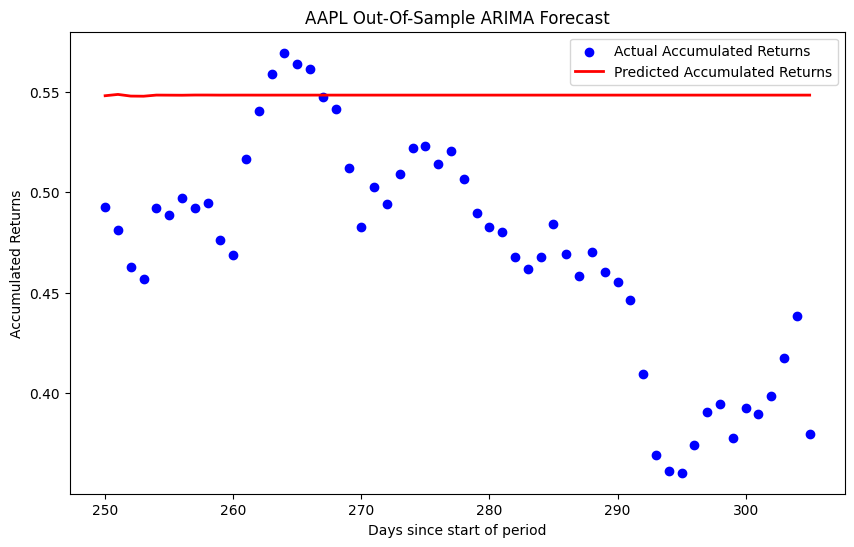

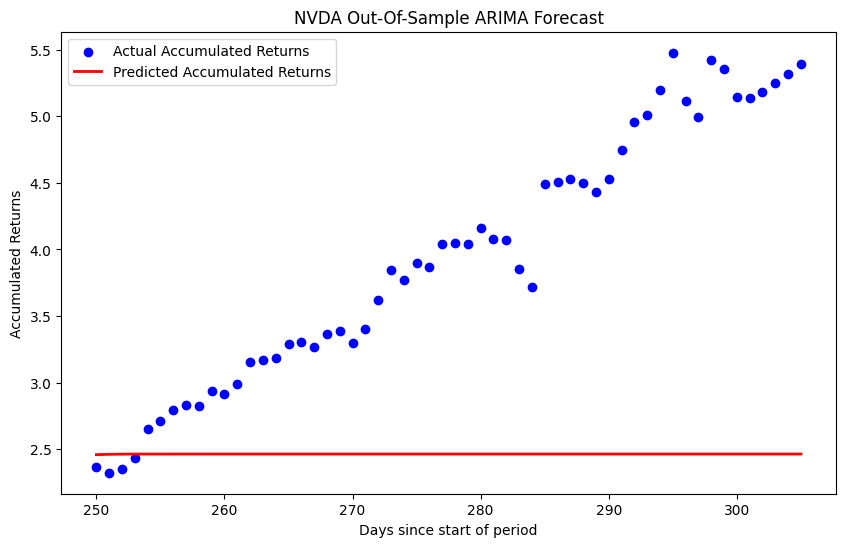

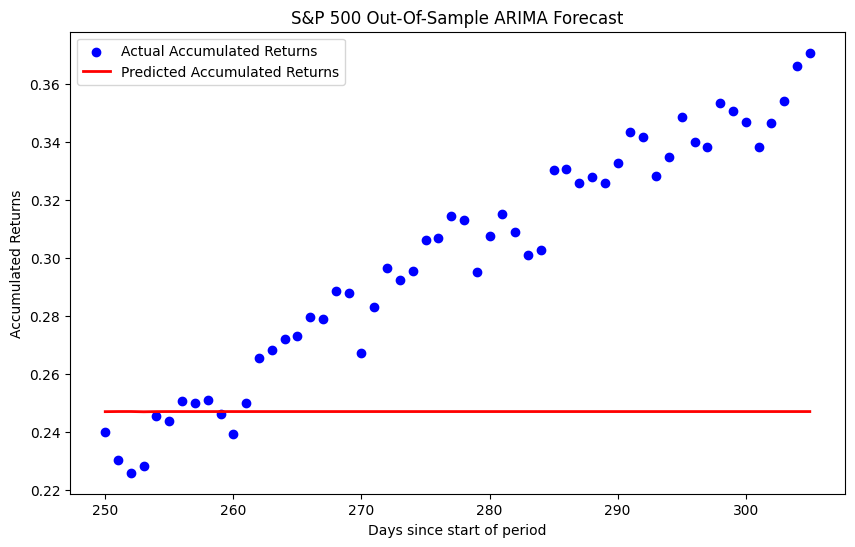

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def fetch_and_process_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Returns'] = data['Adj Close'].pct_change()
    data['Accumulated Returns'] = data['Returns'].add(1).cumprod().subtract(1)
    return data.fillna(0)  # Fill NaN values with 0

def prepare_data_for_regression(data):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Accumulated Returns'].values
    return X, y

def plot_regression_results(X, y, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Accumulated Returns')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted Accumulated Returns')
    plt.title(title)
    plt.xlabel('Days since start of period')
    plt.ylabel('Accumulated Returns')
    plt.legend()
    plt.show()

# Parameters
start_date = '2023-01-01'
end_date_in_sample = '2023-12-31'
start_date_out_sample = '2024-01-01'
end_date_out_sample = '2024-03-22'

# Fetch and process data
aapl_data = fetch_and_process_data('AAPL', start_date, end_date_out_sample)
nvda_data = fetch_and_process_data('NVDA', start_date, end_date_out_sample)
sp500_data = fetch_and_process_data('^GSPC', start_date, end_date_out_sample)  # S&P 500 data

# Split into in-sample and out-of-sample
aapl_in_sample = aapl_data[start_date:end_date_in_sample]
aapl_out_sample = aapl_data[start_date_out_sample:end_date_out_sample]

nvda_in_sample = nvda_data[start_date:end_date_in_sample]
nvda_out_sample = nvda_data[start_date_out_sample:end_date_out_sample]

sp500_in_sample = sp500_data[start_date:end_date_in_sample]  # S&P 500 in-sample data
sp500_out_sample = sp500_data[start_date_out_sample:end_date_out_sample]  # S&P 500 out-of-sample data

# Prepare the data
_, y_aapl = prepare_data_for_regression(aapl_in_sample)
_, y_nvda = prepare_data_for_regression(nvda_in_sample)
_, y_sp500 = prepare_data_for_regression(sp500_in_sample)  # S&P 500 data

# ARIMA model
order = (5, 1, 0)  # Example ARIMA order
arima_aapl = ARIMA(y_aapl, order=order).fit()
arima_nvda = ARIMA(y_nvda, order=order).fit()
arima_sp500 = ARIMA(y_sp500, order=order).fit()

# Forecasting Out-of-sample
forecast_aapl = arima_aapl.forecast(steps=len(aapl_out_sample))
forecast_nvda = arima_nvda.forecast(steps=len(nvda_out_sample))
forecast_sp500 = arima_sp500.forecast(steps=len(sp500_out_sample))

# Plotting Out-of-sample predictions
plot_regression_results(np.arange(len(aapl_in_sample), len(aapl_in_sample) + len(aapl_out_sample)).reshape(-1, 1),
                        aapl_out_sample['Accumulated Returns'].values, forecast_aapl, 'AAPL Out-Of-Sample ARIMA Forecast')
plot_regression_results(np.arange(len(nvda_in_sample), len(nvda_in_sample) + len(nvda_out_sample)).reshape(-1, 1),
                        nvda_out_sample['Accumulated Returns'].values, forecast_nvda, 'NVDA Out-Of-Sample ARIMA Forecast')
plot_regression_results(np.arange(len(sp500_in_sample), len(sp500_in_sample) + len(sp500_out_sample)).reshape(-1, 1),
                        sp500_out_sample['Accumulated Returns'].values, forecast_sp500, 'S&P 500 Out-Of-Sample ARIMA Forecast')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


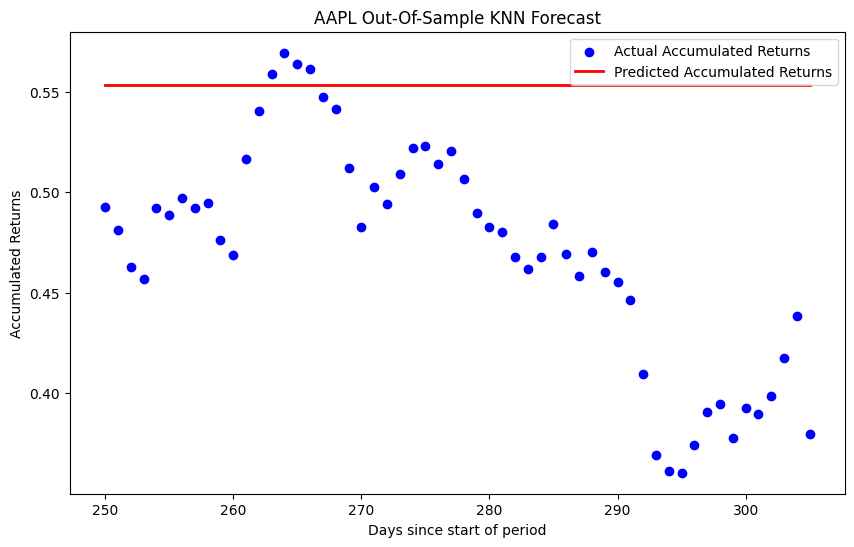

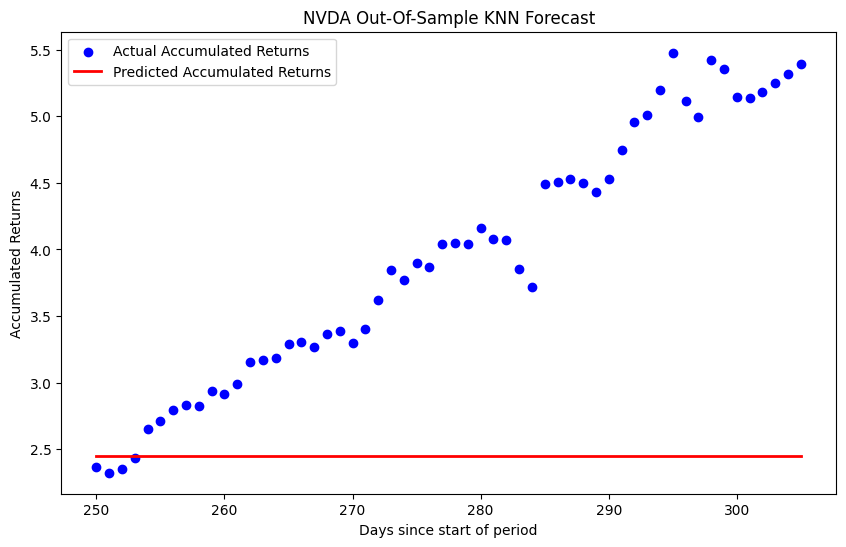

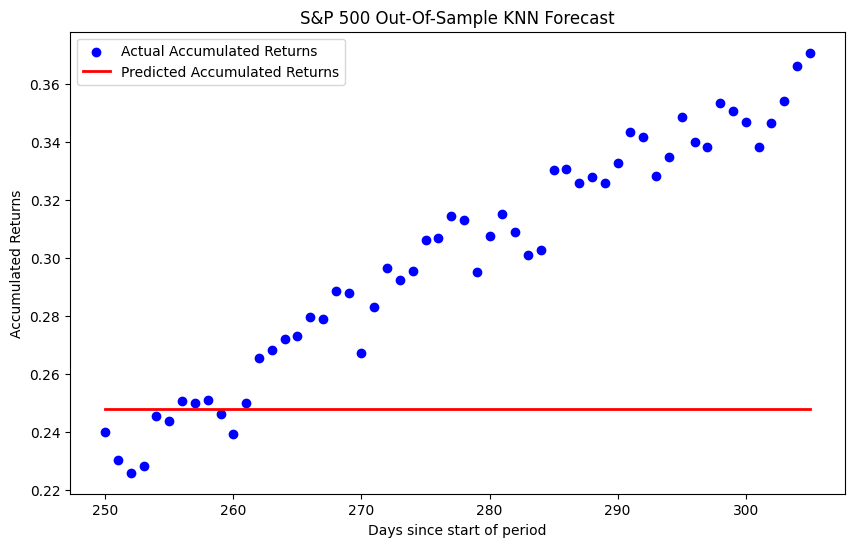

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

def fetch_and_process_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Returns'] = data['Adj Close'].pct_change()
    data['Accumulated Returns'] = data['Returns'].add(1).cumprod().subtract(1)
    return data.fillna(0)  # Fill NaN values with 0

def prepare_data_for_regression(data):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Accumulated Returns'].values
    return X, y

def plot_regression_results(X, y, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Accumulated Returns')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted Accumulated Returns')
    plt.title(title)
    plt.xlabel('Days since start of period')
    plt.ylabel('Accumulated Returns')
    plt.legend()
    plt.show()

# Parameters
start_date = '2023-01-01'
end_date_in_sample = '2023-12-31'
start_date_out_sample = '2024-01-01'
end_date_out_sample = '2024-03-22'

# Fetch and process data
aapl_data = fetch_and_process_data('AAPL', start_date, end_date_out_sample)
nvda_data = fetch_and_process_data('NVDA', start_date, end_date_out_sample)
sp500_data = fetch_and_process_data('^GSPC', start_date, end_date_out_sample)  # S&P 500 data

# Split into in-sample and out-of-sample
aapl_in_sample = aapl_data[start_date:end_date_in_sample]
aapl_out_sample = aapl_data[start_date_out_sample:end_date_out_sample]

nvda_in_sample = nvda_data[start_date:end_date_in_sample]
nvda_out_sample = nvda_data[start_date_out_sample:end_date_out_sample]

sp500_in_sample = sp500_data[start_date:end_date_in_sample]  # S&P 500 in-sample data
sp500_out_sample = sp500_data[start_date_out_sample:end_date_out_sample]  # S&P 500 out-of-sample data

# Prepare the data
_, y_aapl = prepare_data_for_regression(aapl_in_sample)
_, y_nvda = prepare_data_for_regression(nvda_in_sample)
_, y_sp500 = prepare_data_for_regression(sp500_in_sample)  # S&P 500 data

# KNN model
knn_model_aapl = KNeighborsRegressor(n_neighbors=5).fit(np.arange(len(aapl_in_sample)).reshape(-1, 1), y_aapl)
knn_model_nvda = KNeighborsRegressor(n_neighbors=5).fit(np.arange(len(nvda_in_sample)).reshape(-1, 1), y_nvda)
knn_model_sp500 = KNeighborsRegressor(n_neighbors=5).fit(np.arange(len(sp500_in_sample)).reshape(-1, 1), y_sp500)

# Forecasting Out-of-sample
forecast_aapl = knn_model_aapl.predict(np.arange(len(aapl_in_sample), len(aapl_in_sample) + len(aapl_out_sample)).reshape(-1, 1))
forecast_nvda = knn_model_nvda.predict(np.arange(len(nvda_in_sample), len(nvda_in_sample) + len(nvda_out_sample)).reshape(-1, 1))
forecast_sp500 = knn_model_sp500.predict(np.arange(len(sp500_in_sample), len(sp500_in_sample) + len(sp500_out_sample)).reshape(-1, 1))

# Plotting Out-of-sample predictions
plot_regression_results(np.arange(len(aapl_in_sample), len(aapl_in_sample) + len(aapl_out_sample)).reshape(-1, 1),
                        aapl_out_sample['Accumulated Returns'].values, forecast_aapl, 'AAPL Out-Of-Sample KNN Forecast')
plot_regression_results(np.arange(len(nvda_in_sample), len(nvda_in_sample) + len(nvda_out_sample)).reshape(-1, 1),
                        nvda_out_sample['Accumulated Returns'].values, forecast_nvda, 'NVDA Out-Of-Sample KNN Forecast')
plot_regression_results(np.arange(len(sp500_in_sample), len(sp500_in_sample) + len(sp500_out_sample)).reshape(-1, 1),
                        sp500_out_sample['Accumulated Returns'].values, forecast_sp500, 'S&P 500 Out-Of-Sample KNN Forecast')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


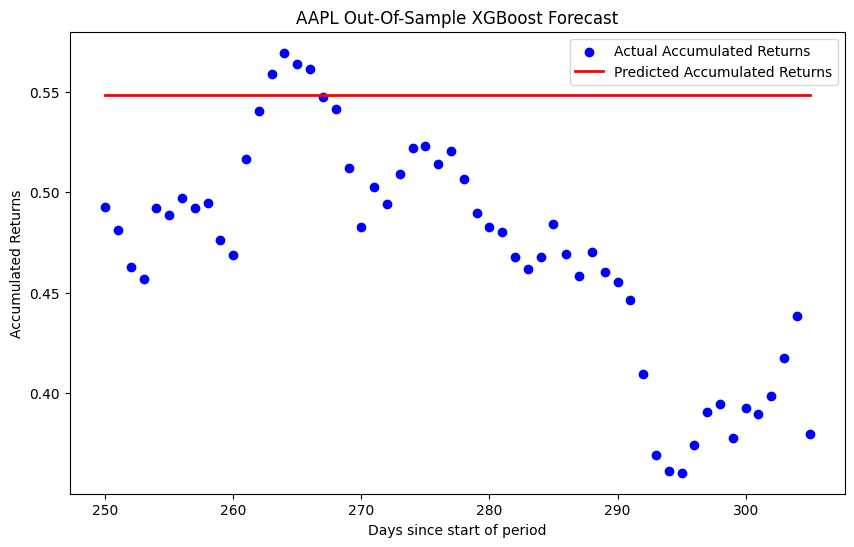

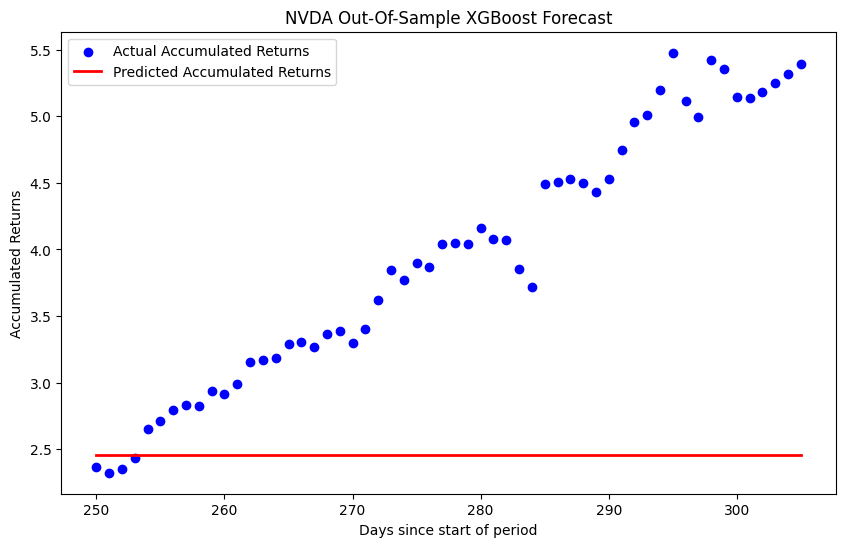

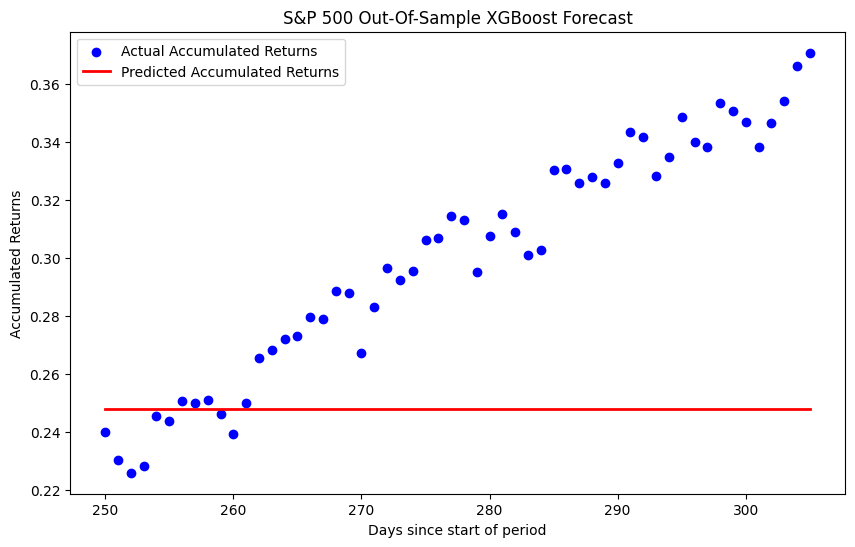

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

def fetch_and_process_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Returns'] = data['Adj Close'].pct_change()
    data['Accumulated Returns'] = data['Returns'].add(1).cumprod().subtract(1)
    return data.fillna(0)  # Fill NaN values with 0

def prepare_data_for_regression(data):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Accumulated Returns'].values
    return X, y

def plot_regression_results(X, y, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Accumulated Returns')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted Accumulated Returns')
    plt.title(title)
    plt.xlabel('Days since start of period')
    plt.ylabel('Accumulated Returns')
    plt.legend()
    plt.show()

# Parameters
start_date = '2023-01-01'
end_date_in_sample = '2023-12-31'
start_date_out_sample = '2024-01-01'
end_date_out_sample = '2024-03-22'

# Fetch and process data
aapl_data = fetch_and_process_data('AAPL', start_date, end_date_out_sample)
nvda_data = fetch_and_process_data('NVDA', start_date, end_date_out_sample)
sp500_data = fetch_and_process_data('^GSPC', start_date, end_date_out_sample)  # S&P 500 data

# Split into in-sample and out-of-sample
aapl_in_sample = aapl_data[start_date:end_date_in_sample]
aapl_out_sample = aapl_data[start_date_out_sample:end_date_out_sample]

nvda_in_sample = nvda_data[start_date:end_date_in_sample]
nvda_out_sample = nvda_data[start_date_out_sample:end_date_out_sample]

sp500_in_sample = sp500_data[start_date:end_date_in_sample]  # S&P 500 in-sample data
sp500_out_sample = sp500_data[start_date_out_sample:end_date_out_sample]  # S&P 500 out-of-sample data

# Prepare the data
_, y_aapl = prepare_data_for_regression(aapl_in_sample)
_, y_nvda = prepare_data_for_regression(nvda_in_sample)
_, y_sp500 = prepare_data_for_regression(sp500_in_sample)  # S&P 500 data

# XGBoost model
xgb_model_aapl = xgb.XGBRegressor(objective ='reg:squarederror').fit(np.arange(len(aapl_in_sample)).reshape(-1, 1), y_aapl)
xgb_model_nvda = xgb.XGBRegressor(objective ='reg:squarederror').fit(np.arange(len(nvda_in_sample)).reshape(-1, 1), y_nvda)
xgb_model_sp500 = xgb.XGBRegressor(objective ='reg:squarederror').fit(np.arange(len(sp500_in_sample)).reshape(-1, 1), y_sp500)

# Forecasting Out-of-sample
forecast_aapl = xgb_model_aapl.predict(np.arange(len(aapl_in_sample), len(aapl_in_sample) + len(aapl_out_sample)).reshape(-1, 1))
forecast_nvda = xgb_model_nvda.predict(np.arange(len(nvda_in_sample), len(nvda_in_sample) + len(nvda_out_sample)).reshape(-1, 1))
forecast_sp500 = xgb_model_sp500.predict(np.arange(len(sp500_in_sample), len(sp500_in_sample) + len(sp500_out_sample)).reshape(-1, 1))

# Plotting Out-of-sample predictions
plot_regression_results(np.arange(len(aapl_in_sample), len(aapl_in_sample) + len(aapl_out_sample)).reshape(-1, 1),
                        aapl_out_sample['Accumulated Returns'].values, forecast_aapl, 'AAPL Out-Of-Sample XGBoost Forecast')
plot_regression_results(np.arange(len(nvda_in_sample), len(nvda_in_sample) + len(nvda_out_sample)).reshape(-1, 1),
                        nvda_out_sample['Accumulated Returns'].values, forecast_nvda, 'NVDA Out-Of-Sample XGBoost Forecast')
plot_regression_results(np.arange(len(sp500_in_sample), len(sp500_in_sample) + len(sp500_out_sample)).reshape(-1, 1),
                        sp500_out_sample['Accumulated Returns'].values, forecast_sp500, 'S&P 500 Out-Of-Sample XGBoost Forecast')
